In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import loaddata
import numpy as np
import sklearn
import jieba
import jieba.posseg as pseg
import sklearn.feature_extraction.text

讠斤 



In [3]:
messages = loaddata.load_message()
content = np.array([m[0] for m in messages])
target = np.array([m[1] for m in messages])

In [5]:
class MessageCountVectorizer(sklearn.feature_extraction.text.CountVectorizer):
    def build_analyzer(self):
        def analyzer(doc):
            words = pseg.cut(doc)
            new_doc = ''.join(w.word for w in words if w.flag != 'x')
            words = jieba.cut(new_doc)
            return words
        return analyzer

vec_count = MessageCountVectorizer(min_df=2,max_df=0.99)
data_count = vec_count.fit_transform(content)
vec_count.get_feature_names()
print(data_count.shape)

(23734, 21959)


In [6]:
has_word = data_count > 0

In [7]:
has_word_freq = has_word.sum(axis = 1)

In [9]:
has_word_freq2 = has_word.sum(axis = 0)

In [10]:
has_word_freq.shape

(23734, 1)

In [11]:
has_word_freq2.shape

(1, 21959)

In [4]:
import matplotlib.pyplot as plt

(array([  5.60186001e-03,   1.61161203e-02,   2.50790963e-02,
          3.21029670e-02,   3.31371565e-02,   3.37835250e-02,
          3.36111601e-02,   3.21029670e-02,   3.08964125e-02,
          2.93020370e-02,   2.99914967e-02,   3.05516827e-02,
          3.37835250e-02,   2.87849422e-02,   3.10256862e-02,
          2.90434896e-02,   3.32233390e-02,   3.39127987e-02,
          3.49469882e-02,   3.75755533e-02,   4.04195745e-02,
          4.24017711e-02,   4.01179359e-02,   3.95146587e-02,
          3.83942867e-02,   3.86097428e-02,   3.94284762e-02,
          2.94744019e-02,   2.49067314e-02,   2.20627102e-02,
          1.91325065e-02,   1.56421168e-02,   1.19793622e-02,
          1.09882639e-02,   5.73113370e-03,   3.49038970e-03,
          3.31802477e-03,   6.89459693e-04,   6.89459693e-04,
          2.58547385e-04,   3.87821078e-04,   3.01638616e-04,
          8.61824617e-05,   0.00000000e+00,   1.29273693e-04]),
 array([  0.        ,   0.97777778,   1.95555556,   2.93333333,
    

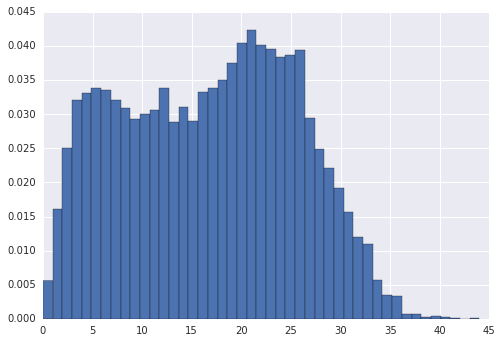

In [21]:
plt.hist(has_word_freq.T.A[0],bins=45,normed=True)

(array([  2.19070000e+04,   3.40000000e+01,   1.00000000e+01,
          1.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          3.00000000e+00]),
 array([  2.00000000e+00,   7.63200000e+02,   1.52440000e+03,
          2.28560000e+03,   3.04680000e+03,   3.80800000e+03,
          4.56920000e+03,   5.33040000e+03,   6.09160000e+03,
          6.85280000e+03,   7.61400000e+03]),
 <a list of 10 Patch objects>)

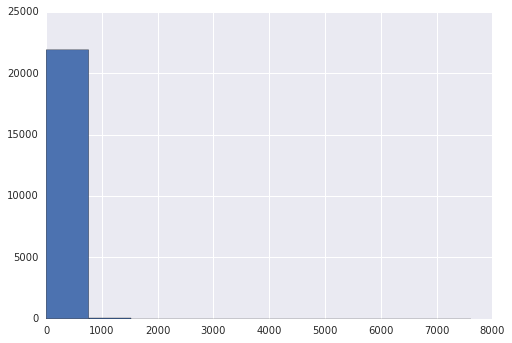

In [28]:
plt.hist(has_word_freq2.A[0])

In [32]:
import collections

In [34]:
words_count = collections.Counter(int(i) for i in has_word_freq2.A[0])

In [38]:
word_count_list = list(words_count.items())

In [42]:
word_count_list.sort()

In [43]:
num = sum(i[1] for i in word_count_list)
curr_sum = num
result = []
for i ,v in word_count_list:
    result.append([i, curr_sum])
    curr_sum -= v

In [47]:
result_rate = [(i, v/num) for i,v in result]
x,y = zip(*result_rate)

(0, 300)

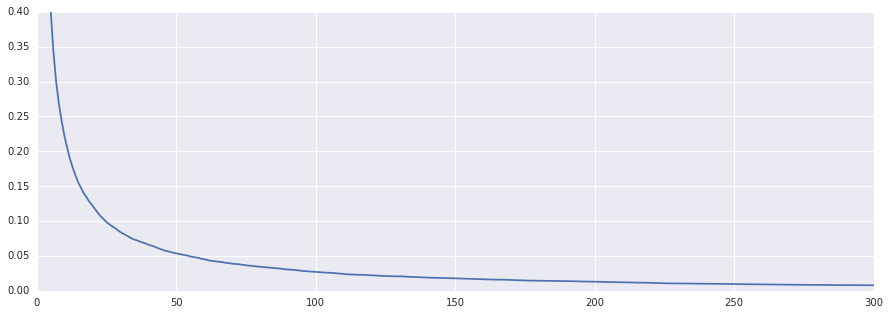

In [56]:
plt.figure(figsize=(15,5))
plt.plot(x,y)
plt.ylim(0,0.4)
plt.xlim(0,300)

In [76]:
i = 3000
vec_count.get_feature_names()[i:i+500]

['上涨',
 '上演',
 '上火',
 '上牌',
 '上班',
 '上班时间',
 '上瘾',
 '上盖',
 '上知',
 '上线',
 '上网',
 '上网卡',
 '上航',
 '上苍',
 '上虞',
 '上行',
 '上街',
 '上衣',
 '上证',
 '上课',
 '上调',
 '上车',
 '上过',
 '上述',
 '上门',
 '上门服务',
 '上限',
 '上面',
 '上风',
 '上饶市',
 '下',
 '下个月',
 '下乡',
 '下令',
 '下列',
 '下午',
 '下去',
 '下发',
 '下周',
 '下周一',
 '下回',
 '下坠',
 '下坡',
 '下学期',
 '下巴',
 '下支',
 '下放',
 '下旬',
 '下星期',
 '下期',
 '下来',
 '下楼',
 '下榻',
 '下次',
 '下款',
 '下水',
 '下注',
 '下海',
 '下游',
 '下班',
 '下站',
 '下线',
 '下腰',
 '下节',
 '下课',
 '下调',
 '下跌',
 '下身',
 '下车',
 '下载',
 '下辈子',
 '下边',
 '下达',
 '下过',
 '下雨',
 '下雪',
 '下面',
 '不',
 '不上',
 '不举',
 '不久',
 '不乖',
 '不了',
 '不予',
 '不交',
 '不仅',
 '不会',
 '不但',
 '不住',
 '不佳',
 '不便',
 '不信',
 '不修',
 '不停',
 '不像',
 '不再',
 '不军',
 '不准',
 '不凡',
 '不出',
 '不分',
 '不到',
 '不办',
 '不动',
 '不动产',
 '不去',
 '不发',
 '不变',
 '不可',
 '不可不',
 '不吃',
 '不同',
 '不含',
 '不含税',
 '不听话',
 '不响',
 '不回',
 '不困',
 '不在乎',
 '不在意',
 '不堪设想',
 '不多',
 '不夜城',
 '不够',
 '不够意思',
 '不大',
 '不太',
 '不太好',
 '不太忙',
 '不好',
 '不好意思',
 '不如',
 '不如意',
 '不学',
 '不安',
 '不定',
 '不定期',
 '不宜',
 '不小',
 

In [90]:
def load_chaifenzi():
    chaifenzi = {}

    with open('data/chaifenzi.txt', encoding='GBK', errors='ignore') as fi:
        for line in fi:
            try:
                c, r = line.split()
                chaifenzi[c] = r
            except:
                print(line)
 
    return chaifenzi
load_chaifenzi()

讠斤 



{'禾少': '秒',
 '亥刂': '刻',
 '犭守': '狩',
 '亻瓦': '佤',
 '冫工': '冮',
 '木当': '档',
 '合鸟': '鸽',
 '阝益': '隘',
 '开刂': '刑',
 '犭句': '狗',
 '扌旁': '搒',
 '工攵': '攻',
 '扌奄': '掩',
 '山反': '岅',
 '土立': '垃',
 '弓也': '弛',
 '亻甘': '佄',
 '亻长': '伥',
 '圭卜': '卦',
 '亻壬': '任',
 '亻主': '住',
 '冫余': '凃',
 '车仑': '轮',
 '月昔': '腊',
 '亻乙': '亿',
 '扌建': '揵',
 '亻为': '伪',
 '亻松': '倯',
 '亻弗': '佛',
 '扌吉': '拮',
 '礻申': '神',
 '禾尔': '称',
 '土亏': '圬',
 '牛生': '牲',
 '讠兼': '谦',
 '亻勺': '仢',
 '亻男': '侽',
 '阝而': '陑',
 '扌式': '拭',
 '亻干': '仠',
 '扌到': '捯',
 '讠工': '讧',
 '饣我': '饿',
 '贝有': '贿',
 '女册': '姗',
 '扌命': '掵',
 '亻奔': '倴',
 '冫列': '冽',
 '求攵': '救',
 '火屯': '炖',
 '氵松': '淞',
 '月空': '腔',
 '讠化': '讹',
 '扌居': '据',
 '讠刍': '诌',
 '讠司': '词',
 '亻田': '佃',
 '扌共': '拱',
 '钅内': '钠',
 '阝兼': '隒',
 '饣司': '饲',
 '氵甫': '浦',
 '扌背': '揹',
 '彳且': '徂',
 '冫东': '冻',
 '冫松': '凇',
 '讠刃': '讱',
 '亻支': '伎',
 '木加': '枷',
 '阝登': '隥',
 '亻全': '佺',
 '周彡': '彫',
 '亻言': '信',
 '亻府': '俯',
 '扌夭': '扷',
 '饣散': '馓',
 '成阝': '郕',
 '讠者': '诸',
 '亻鬼': '傀',
 '阝曾': '鄫',
 '庸阝': '鄘',
 '讠羽': '诩',
 '亻若': '偌',
 '讠委

In [87]:
def load_fantizi():
    fantizi = {}
    with open('data/fantizi.txt', encoding='GBK', errors='ignore') as fi:
        for line in fi:
            try:
                j,f = line.split()
                fantizi[f] = j
            except:
                print(line)
    return fantizi
load_fantizi()

{'網': '网',
 '錘': '锤',
 '適': '适',
 '職': '职',
 '豐': '丰',
 '碼': '码',
 '將': '将',
 '賽': '赛',
 '編': '编',
 '籤': '签',
 '屍': '尸',
 '電': '电',
 '儉': '俭',
 '熒': '荧',
 '鹼': '硷',
 '溫': '温',
 '誕': '诞',
 '內': '内',
 '靈': '灵',
 '攢': '攒',
 '礙': '碍',
 '謝': '谢',
 '駐': '驻',
 '撐': '撑',
 '銅': '铜',
 '溝': '沟',
 '彎': '弯',
 '勻': '匀',
 '懾': '慑',
 '業': '业',
 '鹵': '卤',
 '調': '调',
 '語': '语',
 '頤': '颐',
 '慘': '惨',
 '馳': '驰',
 '億': '亿',
 '縱': '纵',
 '薦': '荐',
 '討': '讨',
 '噴': '喷',
 '郵': '邮',
 '擯': '摈',
 '驕': '骄',
 '鹽': '盐',
 '擁': '拥',
 '贏': '赢',
 '橢': '椭',
 '劉': '刘',
 '嚴': '严',
 '蓋': '盖',
 '剎': '刹',
 '趙': '赵',
 '締': '缔',
 '剝': '剥',
 '聯': '联',
 '賒': '赊',
 '槍': '枪',
 '餃': '饺',
 '猙': '狰',
 '獅': '狮',
 '張': '张',
 '亂': '乱',
 '瓊': '琼',
 '釐': '厘',
 '簍': '篓',
 '撲': '扑',
 '劃': '划',
 '魯': '鲁',
 '厲': '厉',
 '鄉': '乡',
 '潤': '润',
 '娛': '娱',
 '軟': '软',
 '誰': '谁',
 '隨': '随',
 '慮': '虑',
 '納': '纳',
 '機': '机',
 '誘': '诱',
 '擲': '掷',
 '釁': '衅',
 '牽': '牵',
 '竄': '窜',
 '鎂': '镁',
 '確': '确',
 '遙': '遥',
 '務': '务',
 '鈉': '钠',
 '醜': '丑',
 '齲': '龋',

In [9]:
def load_fantizi():
    fantizi = {}
    with open('data/fantizi.txt', encoding='GBK', errors='ignore') as fi:
        for line in fi:
            try:
                j,f = line.split()
                fantizi[f] = j
                print(j,f)
            except:
                print(line)
    return fantizi
fantizi = load_fantizi()

皑 皚
蔼 藹
碍 礙
爱 愛
袄 襖
奥 奧
坝 壩
罢 罷
摆 擺
败 敗
颁 頒
办 辦
绊 絆
帮 幫
绑 綁
镑 鎊
谤 謗
剥 剝
饱 飽
宝 寶
报 報
鲍 鮑
辈 輩
贝 貝
钡 鋇
狈 狽
备 備
惫 憊
绷 繃
笔 筆
毕 畢
毙 斃
币 幣
闭 閉
辟 闢
边 邊
编 編
贬 貶
变 變
辩 辯
辫 辮
标 標
鳖 鱉
别 別
瘪 癟
濒 瀕
滨 濱
宾 賓
摈 擯
饼 餅
并 並
拨 撥
钵 缽
铂 鉑
驳 駁
补 補
财 財
采 採
参 參
残 殘
惭 慚
惨 慘
灿 燦
苍 蒼
舱 艙
仓 倉
沧 滄
厕 廁
侧 側
册 冊
测 測
层 層
诧 詫
搀 攙
掺 摻
蝉 蟬
馋 饞
谗 讒
缠 纏
铲 鏟
产 產
阐 闡
颤 顫
场 場
尝 嘗
长 長
偿 償
肠 腸
厂 廠
畅 暢
钞 鈔
车 車
彻 徹
尘 塵
陈 陳
衬 襯
撑 撐
称 稱
惩 懲
诚 誠
骋 騁
迟 遲
驰 馳
耻 恥
齿 齒
炽 熾
冲 沖
虫 蟲
宠 寵
畴 疇
踌 躊
筹 籌
绸 綢
丑 醜
橱 櫥
厨 廚
锄 鋤
雏 雛
础 礎
储 儲
触 觸
处 處
传 傳
疮 瘡
闯 闖
创 創
锤 錘
纯 純
绰 綽
辞 辭
词 詞
赐 賜
聪 聰
葱 蔥
囱 囪
从 從
丛 叢
凑 湊
蹿 躥
窜 竄
错 錯
达 達
带 帶
贷 貸
担 擔
单 單
郸 鄲
掸 撣
胆 膽
惮 憚
诞 誕
弹 彈
当 當
挡 擋
党 黨
荡 蕩
档 檔
捣 搗
岛 島
祷 禱
导 導
盗 盜
灯 燈
邓 鄧
敌 敵
涤 滌
递 遞
缔 締
颠 顛
点 點
垫 墊
电 電
钓 釣
调 調
谍 諜
叠 疊
钉 釘
顶 頂
锭 錠
订 訂
丢 丟
东 東
动 動
栋 棟
冻 凍
斗 鬥
犊 犢
独 獨
读 讀
赌 賭
镀 鍍
锻 鍛
断 斷
缎 緞
兑 兌
队 隊
对 對
顿 頓
钝 鈍
夺 奪
堕 墮
鹅 鵝
额 額
讹 訛
恶 惡
饿 餓
儿 兒
尔 爾
饵 餌
贰 貳
发 發
罚 罰
阀 閥
珐 琺
矾 礬
钒 釩
烦 煩
范 範
贩 販
饭 飯
访 訪
纺 紡
飞 飛
诽 誹
废 廢
费 費
纷 紛
坟 墳
奋 奮
愤 憤
粪 糞
丰 豐
枫 楓
锋 鋒
风 風
疯 瘋
冯 馮
缝 縫
讽 諷
凤 鳳
肤 膚
辐 輻
抚 撫
辅 輔
赋 賦
复 復
负 負
讣 訃
妇 婦
缚 縛


In [4]:
import importlib
importlib.reload(loaddata)

讠斤 



<module 'loaddata' from '/media/spirit/文档/baidu/spiritdjy/codes/messageclassifieranalysis/loaddata.py'>

In [4]:
fantizi = loaddata.load_fantizi()
content_after_fantizi = []
processed = set()
for i in content:
    new_words=''
    for k in i:
        if k in fantizi:
            new_words += fantizi[k]
            processed.add((k, fantizi[k]))
        else:
            new_words += k
    content_after_fantizi.append(new_words)
processed


{('來', '来'),
 ('個', '个'),
 ('們', '们'),
 ('兒', '儿'),
 ('嗎', '吗'),
 ('場', '场'),
 ('將', '将'),
 ('對', '对'),
 ('廠', '厂'),
 ('後', '后'),
 ('戶', '户'),
 ('於', '于'),
 ('栗', '傈'),
 ('樣', '样'),
 ('沒', '没'),
 ('給', '给'),
 ('聲', '声'),
 ('著', '着'),
 ('見', '见'),
 ('訴', '诉'),
 ('話', '话'),
 ('車', '车'),
 ('這', '这'),
 ('還', '还'),
 ('錯', '错'),
 ('黃', '黄')}

In [5]:
chaifenzi = loaddata.load_chaifenzi()
content_after_chaifenzi = []
found_chaifenzi = set()
for line in content_after_fantizi:
    result = line
    for k,v in chaifenzi.items():
        if k in line:
            found_chaifenzi.add((k,v))
            result = result.replace(k,v)
    content_after_chaifenzi.append(result)

讠斤 



In [23]:
content_after_chaifenzi

['闽通泉厦的士调度现已开通泉州至厦门往返的士专线，承接拼车，包车等业务，上门接送。乘车专线0595-28953688－13599923233',
 '集的场所。天气较冷,及时加衣,哥弟专卖店/毛利',
 '股??申购限额：1万股??发行市盈：50.96倍??2、海大集团（深:002311）??发行价：28元??发行量：5600万股??申购',
 '你好:‘石化双雄’开盘后低走带动股市出现一段小幅跳水,两市双双翻绿,东方私募内部操作以5.70左右介入的600798宁波海运预估明日收',
 '尊敬的贵宾您好，STAVA-斯得雅男装店冬装新款第二波段已全面到货，敬请您的光临！雅仕生活，精彩无限！详情69839989',
 '报名截止日期：11月25日名额仅限30名报名电话：029-83384036    029-81868236（李经理）凯瑟琳美业幸福北路15号',
 '李老师您好:今日大盘在没有重大消息的影响下逐步走高，目前仍然可持乐观态度，继续关注有色金属、煤炭电力等板块，中线可关注银行、地产的动向',
 '尊敬的客户，您的民生银行专属理财经理杨南温馨提示：近期我行仅向贵宾客户推出多款专属理财产品，年收益率4.1%-5.3%，额度有限，欲购',
 '各位经销商，现在美的空调兑现家电下乡录单费用，请与各县级代理商联系，核对。注：兑现自己开发票、自己录入的。二十元一单。如有不明处电话咨询。',
 '箭牌卫浴．瓷砖(晋江市标)上品生活馆将于12月6日疯惠开业．厂家疯狂优惠：198元的马桶等你抢．疯惠礼包预定中..疯惠热线：22926090',
 '兄弟装饰祝你喜接新房！欢迎你及家人到较场口工商银行四楼咨询装修，希望我们能为你服务，请与我联系，朱玲13608309056',
 '养老等问题.平安保险代理人王小莉.有意购买请拔电话13628259285',
 '美丽、自信、完美，玛莉安娜馨韩一微雕无痕帮您做到。美丽热线：88484891',
 '您好，尊敬的顾客，南坪阳光汇沃尔玛博士眼镜新到货一批夕阳红老花：价格39到129，质量优异售后无忧，联系电话62387901',
 '招商证券上市表现不佳，股指震荡上攻前期成交密集区，快赢数据周二显示资金进出平衡，今日开盘走势决定后期有无创短线新高可能。',
 '您所选铃图下载网址（不含流量费）：http://218.206.73.2

In [6]:
digits_features = np.zeros((len(content),16))
import re
for i,line in enumerate(content):
    for digits in re.findall(r'\d+', line):
        length = len(digits)
        if 0 < length <= 15:
            digits_features[i, length-1] += 1
        elif length > 15:
            digits_features[i, 15] += 1

In [8]:
digits_features.shape

(23734, 16)

In [9]:
digits_features

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 2.,  3.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 6.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  2.]])

In [10]:
class TfidfVectorizer(sklearn.feature_extraction.text.TfidfVectorizer):
    def build_analyzer(self):
        #analyzer = super(TfidfVectorizer, self).build_analyzer()
        def analyzer(doc):
            words = pseg.cut(doc)
            new_doc = ''.join(w.word for w in words if w.flag != 'x')
            words = jieba.cut(new_doc)
            return words
        return analyzer

vec_tfidf = TfidfVectorizer(min_df=2,max_df=0.8)
data_tfidf = vec_tfidf.fit_transform(content_after_chaifenzi)
print(data_tfidf.shape)



Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.cache
Loading model cost 0.900 seconds.
DEBUG:jieba:Loading model cost 0.900 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


(23734, 21948)


In [15]:
data_tfidf_digits = scipy.sparse.csr.csr_matrix(np.concatenate((data_tfidf.A, digits_features),axis=1))

In [17]:
data_tfidf_digits.shape

(23734, 21964)

In [19]:
def test_SVM(data, target):
    from sklearn.grid_search import GridSearchCV
    from sklearn.svm import SVC
    clf = SVC()

    C =  [0.1, 0.5, 0.75, 1, 2, 3, 5, 10, 30]
    kernel = ['linear'] # 'poly',
    param_grid = [{'C': C, 'kernel':kernel}]
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10)
    grid_search.fit(data, target)

    return grid_search
grid_search = test_SVM(data_tfidf_digits, target)
print(grid_search.grid_scores_)
grid_search.best_score_, grid_search.best_estimator_, grid_search.best_params_

[mean: 0.89007, std: 0.02365, params: {'kernel': 'linear', 'C': 0.1}, mean: 0.95037, std: 0.01435, params: {'kernel': 'linear', 'C': 0.5}, mean: 0.95774, std: 0.01242, params: {'kernel': 'linear', 'C': 0.75}, mean: 0.96086, std: 0.01150, params: {'kernel': 'linear', 'C': 1}, mean: 0.96549, std: 0.01003, params: {'kernel': 'linear', 'C': 2}, mean: 0.96549, std: 0.01016, params: {'kernel': 'linear', 'C': 3}, mean: 0.96461, std: 0.01031, params: {'kernel': 'linear', 'C': 5}, mean: 0.96318, std: 0.01035, params: {'kernel': 'linear', 'C': 10}, mean: 0.96237, std: 0.01053, params: {'kernel': 'linear', 'C': 30}]


(0.96549254234431614, SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False), {'C': 2, 'kernel': 'linear'})

In [31]:
def show_table(colums, values, float_size=4):
    def get_str(x):
        if  isinstance(x, float):
            return '{:.4f}'.format(x)
        return str(x)
    sep = ['-' for i in colums]
    print('|'+'|'.join(colums)+ '|')
    print('|'+'|'.join(sep)+ '|')
    for v in values:
        print('|'+'|'.join([get_str(i) for i in v])+ '|')


def covert_bestscores_2_table(grid_scores_):
    values = []
    for line in grid_scores_:
        z = list(line[0].items())
        z.sort()
        _, para = zip(*z)
        best = line[1]
        std_ = np.std(line[2])
        values.append(list(para)+[best, std_])
    show_table(list(_)+['best','std'], values)

In [32]:
covert_bestscores_2_table(grid_search.grid_scores_)

|C|kernel|best|std|
|-|-|-|-|
|0.1000|linear|0.8901|0.0237|
|0.5000|linear|0.9504|0.0144|
|0.7500|linear|0.9577|0.0124|
|1|linear|0.9609|0.0115|
|2|linear|0.9655|0.0100|
|3|linear|0.9655|0.0102|
|5|linear|0.9646|0.0103|
|10|linear|0.9632|0.0103|
|30|linear|0.9624|0.0105|


In [36]:
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
def get_classes_accury(data, target, test_times = 10, test_size=0.1):
    target_list = list(set(target))
    target_list.sort()
    scores = np.zeros((test_times,len(target_list)))
    for t in range(test_times):
        clf = SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False)
        Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size=test_size,
                                                    random_state=t)
        clf.fit(Xtrain, ytrain)
        print(t, clf.score(Xtest, ytest))
        pre = clf.predict(Xtest)
        for i,c in enumerate(target_list):
            s = np.logical_and(pre==c, ytest==c).sum()/ (ytest==c).sum()
            scores[t, i] = s

    ##### 生成表格
    print('|'+'class'+'|'+'|'.join([str(i) for i  in target_list]) +'|')
    print('|'+'-'+'|')
    for i,score in enumerate(scores):
        print( '|'+str(i)+'|'+ '|'.join(['{:.4f}'.format(_) for _ in score])+ '|' )
    print( '|'+'max'+ '|'+ '|'.join(['{:.4f}'.format(_) for _ in scores.max(axis=0)])+ '|' )
    print( '|'+'min'+ '|'+ '|'.join(['{:.4f}'.format(_) for _ in scores.min(axis=0)])+ '|' )
    print( '|'+'mean'+'|'+  '|'.join(['{:.4f}'.format(_) for _ in scores.mean(axis=0)])+ '|' )

    return scores
scores = get_classes_accury(data_tfidf_digits, target)

0 0.964195450716
1 0.969250210615
2 0.96798652064
3 0.975147430497
4 0.976411120472
5 0.96798652064
6 0.967565290649
7 0.969671440607
8 0.968828980623
9 0.965037910699
|class|1|2|3|4|5|6|
|-|
|0|0.9896|0.9710|0.6250|0.8854|0.9620|0.8689|
|1|0.9884|0.9607|0.7647|0.9071|0.9719|0.9000|
|2|0.9963|0.9568|0.6316|0.9104|0.9660|0.8621|
|3|0.9925|0.9691|0.7917|0.9141|0.9900|0.8806|
|4|0.9953|0.9686|0.6667|0.8989|0.9904|0.9420|
|5|0.9964|0.9644|0.8000|0.8634|0.9623|0.8596|
|6|0.9903|0.9727|0.6429|0.8706|0.9759|0.8861|
|7|0.9929|0.9710|0.7273|0.9222|0.9625|0.7778|
|8|0.9917|0.9673|0.7333|0.8981|0.9745|0.8382|
|9|0.9888|0.9636|0.7143|0.8827|0.9584|0.9362|
|max|0.9964|0.9727|0.8000|0.9222|0.9904|0.9420|
|min|0.9884|0.9568|0.6250|0.8634|0.9584|0.7778|
|mean|0.9922|0.9665|0.7097|0.8953|0.9714|0.8751|


In [ ]:
data_tfidf_digits, 

In [42]:
target_for_class3 = (target=='3') + np.zeros(len(target))

In [44]:
target_for_class3.sum()

158.0

In [50]:
def cross_validation_for_class_x(data, target):
    all_sample_n = len(target)
    all_x_sample, right_sample = 0, 0
    train = np.ones(all_sample_n, dtype=bool)
    errs_list = []
    for i in range(all_sample_n):
        if target[i] == 0:
            continue
        all_x_sample += 1
        train[i] = False
        clf = SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False)
        clf.fit(data[train], target[train])
        pre = clf.predict(data[i])
        if int(pre[0]) != 0:
            right_sample += 1
        else:
            errs_list.append(i)
        train[i] = True
        print('times:', i, ' answers:', pre, ' all_times:', all_x_sample, ' right', right_sample)
    return all_x_sample, right_sample, errs_list

In [51]:
all_x_sample, right_sample, errs_list = cross_validation_for_class_x(data_tfidf_digits, target_for_class3)

times: 476  answers: [ 1.]  all_times: 1  right 1
times: 477  answers: [ 1.]  all_times: 2  right 2
times: 478  answers: [ 1.]  all_times: 3  right 3
times: 479  answers: [ 1.]  all_times: 4  right 4
times: 480  answers: [ 1.]  all_times: 5  right 5
times: 481  answers: [ 1.]  all_times: 6  right 6
times: 482  answers: [ 0.]  all_times: 7  right 6
times: 483  answers: [ 1.]  all_times: 8  right 7
times: 484  answers: [ 1.]  all_times: 9  right 8
times: 485  answers: [ 1.]  all_times: 10  right 9
times: 486  answers: [ 1.]  all_times: 11  right 10
times: 487  answers: [ 1.]  all_times: 12  right 11
times: 488  answers: [ 0.]  all_times: 13  right 11
times: 489  answers: [ 1.]  all_times: 14  right 12
times: 490  answers: [ 1.]  all_times: 15  right 13
times: 491  answers: [ 1.]  all_times: 16  right 14
times: 492  answers: [ 1.]  all_times: 17  right 15
times: 493  answers: [ 1.]  all_times: 18  right 16
times: 494  answers: [ 1.]  all_times: 19  right 17
times: 495  answers: [ 1.]  all

In [52]:
101/158

0.6392405063291139

In [54]:
for i in errs_list:
    print(content[i])

如果你已经有女朋友，就尽量拒绝应酬吧，拥有良好的生活习惯，会增加她对你的信任感。羡慕明星的潇洒签名?(回复8820+姓名)你也可以拥有!2元
正确，抽奖机会又增加一次！题：陈楚生的成名曲是？回数字选择：1有没有人告诉你，2姑娘 每条1元,
您的手机号已被央视6+1节目抽选为今日之星，详情请登陆:www.ctv996.cn/查收!领 奖 号为【5188】感谢您的支持！,
属太阳星，夫妻宫，子女宫旺盛，夫妻关系和谐，子嗣大有作为。他/她的人际关系会成为你的幸运星，有偏财机遇。回1897观今世桃花,
老师看瞌睡的学生感慨：拿破仑一天只睡三小时，你们得到啥启示？阿呆：睡眠不足会长不高。不为人知的情感揭秘拨12590561607,2元/分
恭喜你得奖金1000元！请拨打12590455522获大奖！,
法官：你为什么要印假.钞？被告无辜地说：因为我不会印真钞。,告诉你美满姻缘的秘方！回复（54男姓名配女姓名）看谁与你天生一对？2元
太棒了，正确！再答对2道题就获得4000元奖金的抽奖资格!回复1120索取第2道题. 移动1元/条联通2元/条，询95105917
江津移动年末为回馈您这样的高端用户，特为您提供存600送300，存1200元话费送600元话费等优惠，还有更多活动请咨询本机，江津移动陈治龙
换个玩法过新年，即日起至28日，转发短信、彩信、彩铃送福给亲朋，按发送量排名进行评奖。奖3G手机、充值卡等。详询当地营业厅。【商洛移动】
欢迎来到扎金花游戏专区：系统赠送您游戏点卡20元（用于下注），按规则（回DGH看规则），有机会等价兑现哦。想继续获取更多点卡直接回复DGD
欢迎来到江苏卫视幸福指数调查，每次随机3题，了解你的幸福状况，并有机会赢取幸福大奖！回复8890翻开幸福问卷。1元/条
滚雪球深度行情终端隆重上线，每月仅需140元。本月冠军收益率超大盘近26%，拨打4007030400立即多送一个月使用期/拒收回N【滚雪球】
感谢参与。错位音乐大考验，打乱歌词你能猜出歌曲名吗？回复W马上参与，赢取笔记本电脑及超炫MP3！信息费1元/条。询01068579891
陈培你认不认识一个叫陈艳敏的女孩？你的手机能否上网？如能我给你一个免费网址『wapnews.i139.cn/』
本条免费。铃声地址已发至手机，请进入短信息收件箱查找，点击链接进行下载。回复“ZDM+歌曲名或歌手名”

In [56]:
import collections
count = collections.defaultdict(int)
for line, cls in zip(content, target):
    if '回复' in line:
        count[cls] += 1
print(count)

defaultdict(<class 'int'>, {'4': 35, '3': 43, '6': 2, '1': 14, '2': 12, '5': 85})
